In [240]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder, scale
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.model_selection import train_test_split
from tabulate import tabulate

warnings.filterwarnings("ignore")

# Read From CSV

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Getting Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# missing values stats
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Differentiate Positive & Negative

In [5]:
df_pos = df[df['Class']==1]
df_neg = df[df['Class']==0]

df_pos.info()
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 2

In [6]:
# populate required training and test sets
df_train_pos = df_pos.sample(frac=0.8, random_state=42)
df_test_pos = df_pos.drop(df_train_pos.index)

df_train_neg = df_neg.sample(frac=0.8, random_state=42)
df_test_neg = df_neg.drop(df_train_neg.index)

# merge positive and negative data again
df_train = pd.concat([df_train_neg, df_train_pos], ignore_index=True).sample(frac=1, random_state=42)
df_test = pd.concat([df_test_neg, df_test_pos], ignore_index=True).sample(frac=1, random_state=42)

In [7]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227846 entries, 58579 to 121958
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227846 non-null  float64
 1   V1      227846 non-null  float64
 2   V2      227846 non-null  float64
 3   V3      227846 non-null  float64
 4   V4      227846 non-null  float64
 5   V5      227846 non-null  float64
 6   V6      227846 non-null  float64
 7   V7      227846 non-null  float64
 8   V8      227846 non-null  float64
 9   V9      227846 non-null  float64
 10  V10     227846 non-null  float64
 11  V11     227846 non-null  float64
 12  V12     227846 non-null  float64
 13  V13     227846 non-null  float64
 14  V14     227846 non-null  float64
 15  V15     227846 non-null  float64
 16  V16     227846 non-null  float64
 17  V17     227846 non-null  float64
 18  V18     227846 non-null  float64
 19  V19     227846 non-null  float64
 20  V20     227846 non-null  float64
 21  V21   

In [8]:
# Separate target feature
df_train_target = df_train['Class']
df_train = df_train.drop(columns = ['Class'],axis=1)

df_test_target = df_test['Class']
df_test = df_test.drop(columns = ['Class'],axis=1)

In [9]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,...,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000
mean,94880.713219,0.000927,-0.000493,0.000084,-0.000280,0.000274,-0.001122,0.000217,-0.000806,0.000796,...,-0.000944,0.000692,0.000153,0.000084,-0.000234,-0.000617,0.000110,0.000007,0.000206,88.181112
std,47489.533242,1.958114,1.649212,1.511147,1.414571,1.379047,1.331372,1.236957,1.197653,1.097173,...,0.770962,0.739635,0.726242,0.627529,0.605319,0.521235,0.481920,0.404949,0.326859,250.742414
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54222.250000,-0.919884,-0.598702,-0.891755,-0.847113,-0.692178,-0.768617,-0.553486,-0.207855,-0.640306,...,-0.211633,-0.228236,-0.542163,-0.161945,-0.354782,-0.316923,-0.326490,-0.070722,-0.052931,5.640000
50%,84797.500000,0.018674,0.064772,0.179854,-0.021382,-0.054811,-0.274150,0.040419,0.023199,-0.050665,...,-0.062598,-0.029274,0.006543,-0.010986,0.040799,0.016081,-0.051654,0.001465,0.011223,22.000000
75%,139362.000000,1.315616,0.803875,1.026418,0.742258,0.611324,0.397553,0.570516,0.327803,0.598325,...,0.132728,0.186398,0.528214,0.147585,0.439021,0.349884,0.240834,0.091203,0.078129,77.500000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,19.587773,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000


# Standardization

In [10]:
std_scalar = StandardScaler()
df_train[df_train.columns] = std_scalar.fit_transform(df_train[df_train.columns])
df_test[df_test.columns] = std_scalar.fit_transform(df_test[df_test.columns])

In [11]:
df_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,...,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000,227846.00000
mean,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.99793,-28.80760,-44.09100,-31.97953,-4.01740,-82.48001,-19.64849,-35.21349,-61.13297,-12.24501,...,-70.68685,-47.09236,-15.05465,-71.40371,-4.68579,-19.75078,-5.40477,-55.72485,-47.20784,-0.35168
25%,-0.85616,-0.47026,-0.36272,-0.59017,-0.59865,-0.50212,-0.57647,-0.44763,-0.17288,-0.58432,...,-0.27328,-0.30952,-0.74674,-0.25820,-0.58572,-0.60684,-0.67771,-0.17466,-0.16257,-0.32919
50%,-0.21233,0.00906,0.03957,0.11896,-0.01492,-0.03994,-0.20507,0.03250,0.02004,-0.04690,...,-0.07997,-0.04051,0.00880,-0.01764,0.06779,0.03204,-0.10741,0.00360,0.03370,-0.26394
75%,0.93666,0.67141,0.48773,0.67918,0.52492,0.44310,0.29945,0.46105,0.27438,0.54461,...,0.17338,0.25108,0.72712,0.23505,0.72566,0.67244,0.49951,0.22520,0.23840,-0.04260
max,1.64060,1.25170,13.37504,6.20886,11.92988,25.23588,55.05818,97.48891,16.35584,14.21311,...,51.13341,36.77789,14.46206,35.90012,7.57417,11.64825,7.29840,78.06474,103.55424,102.10891


# Logistic Regression Implementation

In [187]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def L2_loss_func(y, hx, theta, lambda_reg):
    m = len(y)
    regularization_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)  # Excluding bias term
    loss = -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx)) + regularization_term
    return loss

def gradient(X, y, y_hat, theta, lambda_reg):
    m = len(y)
    regularization_term = (lambda_reg / m) * theta
    regularization_term[0] = 0  # Bias term should not be regularized
    return (np.dot(X.T, y_hat - y) + regularization_term) / m

def normalize(X):
    tmp = np.array(X, dtype=np.float64)
    return (tmp - tmp.mean(axis=0)) / tmp.std(axis=0)  # (x-u)/sigma

In [188]:
def LR_train_model(X_train, Y_train, learning_rate, lambda_reg, max_itr=1000, threshold=0.5):
    # Extract # of data and features
    m_data, n_features = X_train.shape

    # Train weights with 1 extra bias (so, (n+1)x1)
    trainer_w = np.zeros((n_features + 1, 1))

    # Make X_train ready with normalization and adding extra bias column
    X_train_normalized = normalize(X_train)
    X_train_normalized = np.c_[X_train_normalized, np.ones((m_data, 1))]

    # Accordingly change Y_train
    Y_train = Y_train.reshape(m_data, 1)

    for _ in range(max_itr):
        Y_predict = sigmoid(np.dot(X_train_normalized, trainer_w))

        # Compute the loss with regularization
        loss = L2_loss_func(Y_train, Y_predict, trainer_w, lambda_reg)

        # Compute the gradient with regularization
        dw = gradient(X_train_normalized, Y_train, Y_predict, trainer_w, lambda_reg)

        # Gradient descent update
        trainer_w = trainer_w - learning_rate * dw

        # Early termination condition
        if loss < threshold:
            break

    return trainer_w

In [189]:
def LR_predict(X_train, trained_w):

   # extract # of data and features
   m_data, n_features = X_train.shape

   # make X_train ready with normalization and adding extra bias column
   X_train = normalize(X_train)
   X_train = np.c_[X_train, np.ones((m_data,1))]

   Y_predict = sigmoid(np.dot(X_train, trained_w))

   all_pred = [1 if pr>=0.5 else 0 for pr in Y_predict]

   return np.array(all_pred).reshape(m_data, 1)

In [237]:
X_train = df_train.to_numpy()
X_test = df_test.to_numpy()
y_train = df_train_target.to_numpy()
y_test = df_test_target.to_numpy()

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Train model using logistic regression
model = LR_train_model(X_train, y_train, learning_rate=0.025, max_itr=3500, lambda_reg=10, threshold=0)
predict_train = LR_predict(X_train, model)

# Predict test dataset based on trained model
predict_test = LR_predict(X_test, model)

# Error Metrics Measurement

## Confusion Matrix of Train

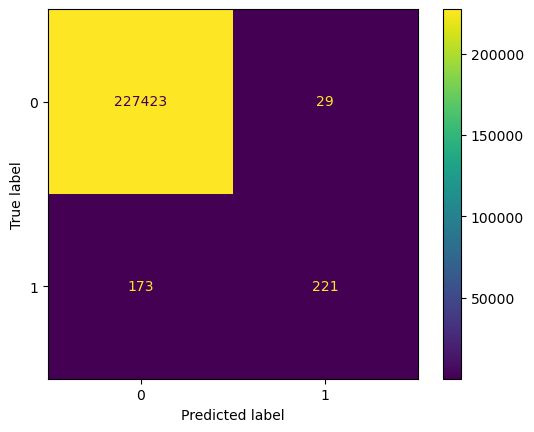

In [249]:
confusion_matrix = metrics.confusion_matrix(y_train, predict_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()

## Confusion Matrix of Test

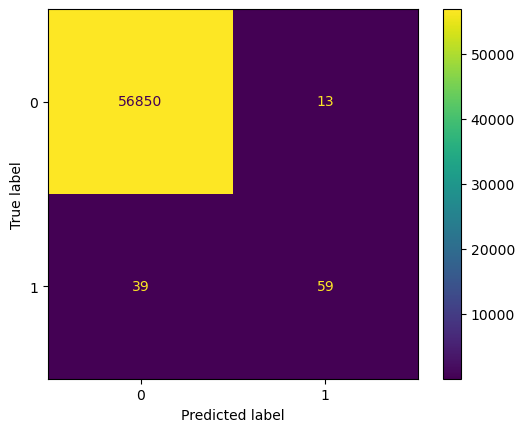

In [250]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()

In [255]:
def evaluate_model(Y_original, Y_predict, ignore_f1=False):
    
    accuracy = metrics.accuracy_score(Y_original, Y_predict)
    precision = metrics.precision_score(Y_original, Y_predict)
    recall = metrics.recall_score(Y_original, Y_predict)
    if not ignore_f1:
        f1_score = metrics.f1_score(Y_original, Y_predict)
    else:
        f1_score = 0
    
    return (accuracy, recall, precision, f1_score)

In [257]:
[accuracy_train, sensitivity_train, precision_train, f1_score_train] = evaluate_model(y_train, predict_train)

# Performance evaluation on test dataset
[accuracy_test, sensitivity_test, precision_test, f1_score_test] = evaluate_model(y_test, predict_test)

# Populate table
col_names = ["\033[1mPerformance measure\033[0m", "\033[1mTraining(%)\033[0m", "\033[1mTest(%)\033[0m"]
data = [
    ["Accuracy", accuracy_train, accuracy_test],
    ["True positive rate (sensitivity, recall, hit rate)", sensitivity_train, sensitivity_test],
    ["Positive predictive value (precision)", precision_train, precision_test],
    ["F1 score", f1_score_train, f1_score_test]
]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════╤═══════════════╤═══════════╕
│ Performance measure                                │   Training(%) │   Test(%) │
╞════════════════════════════════════════════════════╪═══════════════╪═══════════╡
│ Accuracy                                           │      0.999113 │  0.999087 │
├────────────────────────────────────────────────────┼───────────────┼───────────┤
│ True positive rate (sensitivity, recall, hit rate) │      0.560914 │  0.602041 │
├────────────────────────────────────────────────────┼───────────────┼───────────┤
│ Positive predictive value (precision)              │      0.884    │  0.819444 │
├────────────────────────────────────────────────────┼───────────────┼───────────┤
│ F1 score                                           │      0.686335 │  0.694118 │
╘════════════════════════════════════════════════════╧═══════════════╧═══════════╛


# KMeans Unsupervised Clustering

In [266]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [280]:
K_CLUSTER = 10
data = []

def find_k(max_k=K_CLUSTER):
    predicted_clusters = None
    val = 100000
    cluster_no, selected_k = 0, 1
    for k in range(2, max_k):
        clustering = KMeans(n_clusters=k, random_state=42)
        clustering.fit(X)
        
        predicted_clusters = clustering.predict(X)
        ith_cluster = 0
        minimum_value = 100000
        for i in range(k):
            print(f'K = {k}, Cluster = {i}, Val: {(predicted_clusters == i).sum()}')
            if (predicted_clusters == i).sum() < minimum_value:
                minimum_value = (predicted_clusters == i).sum()
                ith_cluster = i
        print('----')
                
        if minimum_value < val:
            val = minimum_value
            cluster_no = ith_cluster
            predicted_clusters = predicted_clusters
            selected_k = k
            
        predicted_clusters[predicted_clusters == ith_cluster] = 100
        predicted_clusters[predicted_clusters != 100] = 0
        predicted_clusters[predicted_clusters == 100] = 1
        
        [accuracy_test, sensitivity_test, precision_test, f1_score_test] = evaluate_model(y, predicted_clusters.reshape(predicted_clusters.shape[0], 1), ignore_f1=True)
        
        data.append([k, accuracy_test, precision_test, sensitivity_test])
        
    return selected_k, val, predicted_clusters, cluster_no

In [281]:
selected_k, val, predicted_clusters, cluster_no = find_k()

K = 2, Cluster = 0, Val: 130086
K = 2, Cluster = 1, Val: 154721
----
K = 3, Cluster = 0, Val: 4789
K = 3, Cluster = 1, Val: 151841
K = 3, Cluster = 2, Val: 128177
----
K = 4, Cluster = 0, Val: 143373
K = 4, Cluster = 1, Val: 20236
K = 4, Cluster = 2, Val: 120949
K = 4, Cluster = 3, Val: 249
----
K = 5, Cluster = 0, Val: 19940
K = 5, Cluster = 1, Val: 113018
K = 5, Cluster = 2, Val: 16163
K = 5, Cluster = 3, Val: 131359
K = 5, Cluster = 4, Val: 4327
----
K = 6, Cluster = 0, Val: 19955
K = 6, Cluster = 1, Val: 99478
K = 6, Cluster = 2, Val: 3438
K = 6, Cluster = 3, Val: 41454
K = 6, Cluster = 4, Val: 3960
K = 6, Cluster = 5, Val: 116522
----
K = 7, Cluster = 0, Val: 16216
K = 7, Cluster = 1, Val: 34753
K = 7, Cluster = 2, Val: 46869
K = 7, Cluster = 3, Val: 19896
K = 7, Cluster = 4, Val: 106875
K = 7, Cluster = 5, Val: 56396
K = 7, Cluster = 6, Val: 3802
----
K = 8, Cluster = 0, Val: 90038
K = 8, Cluster = 1, Val: 3802
K = 8, Cluster = 2, Val: 36437
K = 8, Cluster = 3, Val: 69734
K = 8, 

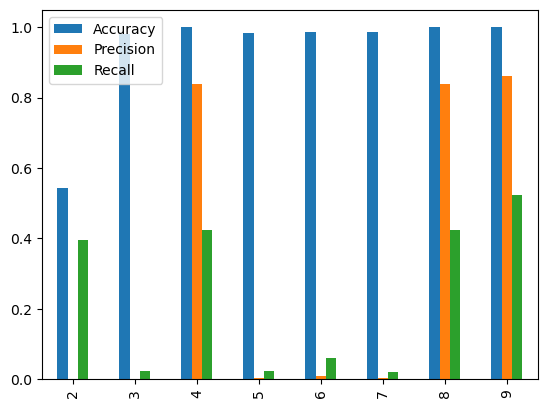

In [282]:
kmeans_df = pd.DataFrame(data, columns=['K', 'Accuracy', 'Precision', 'Recall'], index=list(range(2, K_CLUSTER)))
kmeans_df.drop(columns=['K'], inplace=True)
kmeans_df.plot(kind='bar');

In [283]:
[accuracy_test, sensitivity_test, precision_test, f1_score_test] = evaluate_model(y, predicted_clusters)

# Populate table
col_names = ["\033[1mPerformance measure\033[0m", "\033[1mTest(%)\033[0m"]
data = [
    ["Accuracy", accuracy_test],
    ["True positive rate (sensitivity, recall, hit rate)", sensitivity_test],
    ["Positive predictive value (precision)", precision_test],
    ["F1 score", f1_score_test]
]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════╤═══════════╕
│ Performance measure                                │   Test(%) │
╞════════════════════════════════════════════════════╪═══════════╡
│ Accuracy                                           │  0.999031 │
├────────────────────────────────────────────────────┼───────────┤
│ True positive rate (sensitivity, recall, hit rate) │  0.52439  │
├────────────────────────────────────────────────────┼───────────┤
│ Positive predictive value (precision)              │  0.86     │
├────────────────────────────────────────────────────┼───────────┤
│ F1 score                                           │  0.651515 │
╘════════════════════════════════════════════════════╧═══════════╛
